In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('fa.xlsx')

In [3]:
df.drop('states', axis=1, inplace=True)

In [4]:
df.head(2)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,Cluster,tone_choice
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,1,Persuasive
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,1,Original


In [5]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'Cluster',
       'tone_choice'],
      dtype='object')

## Visuals

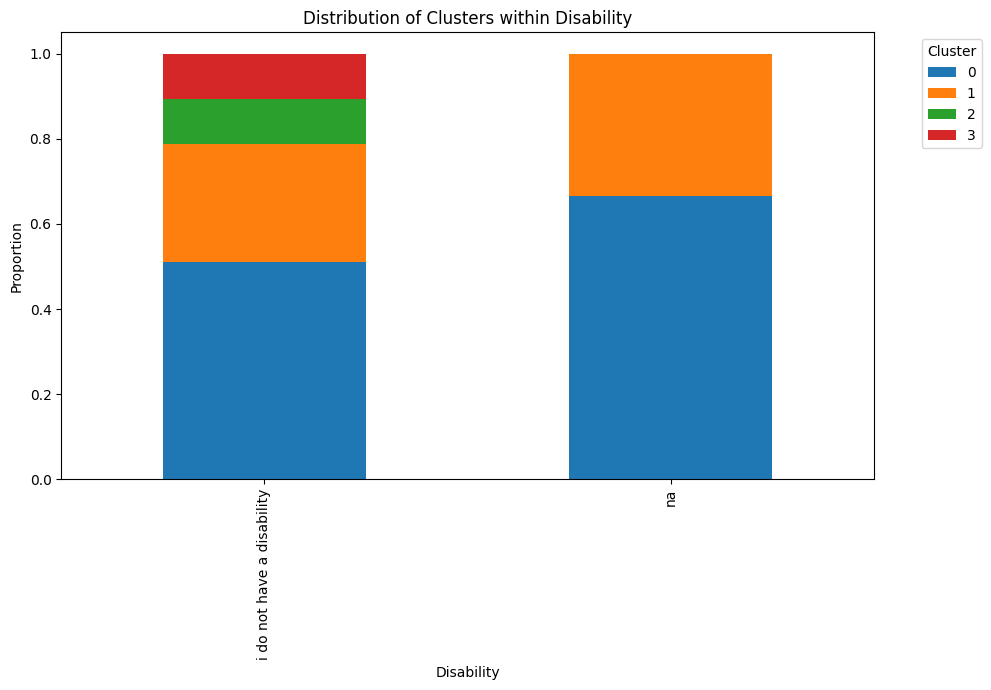

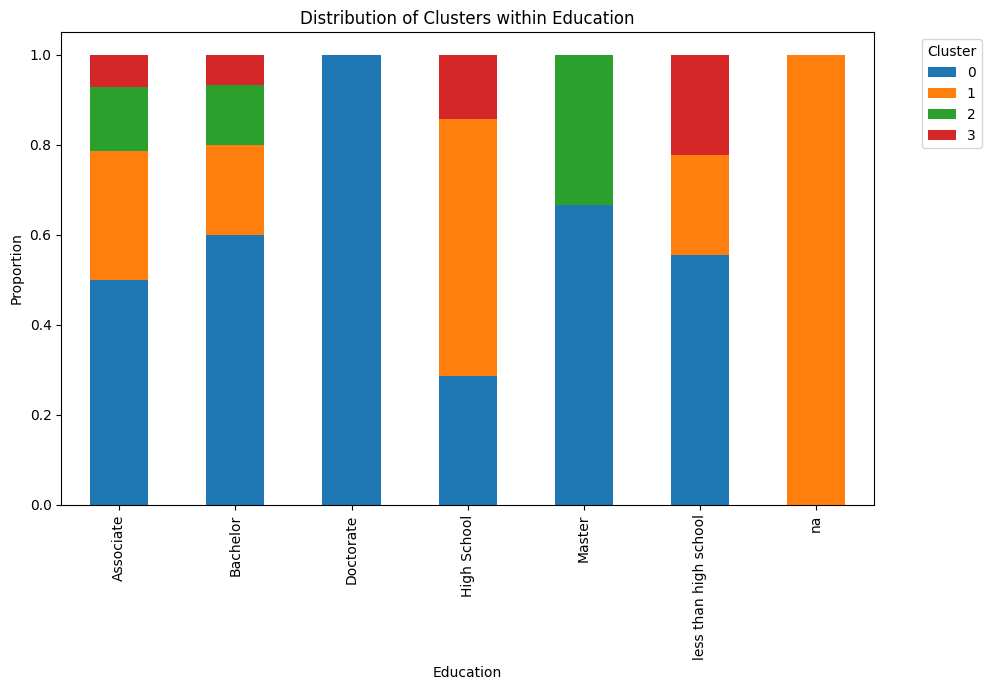

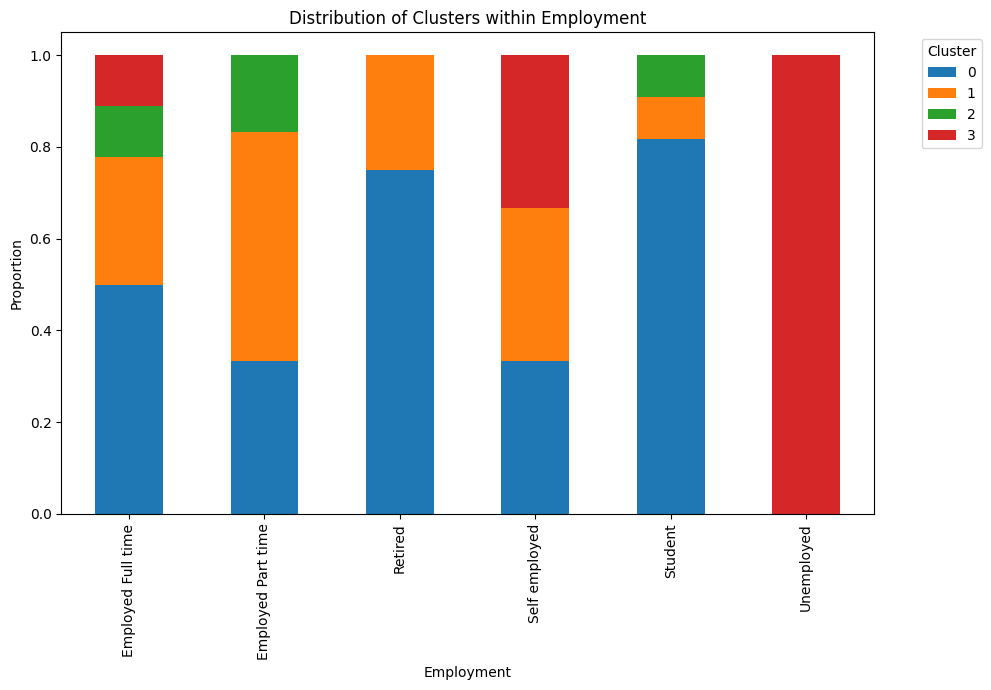

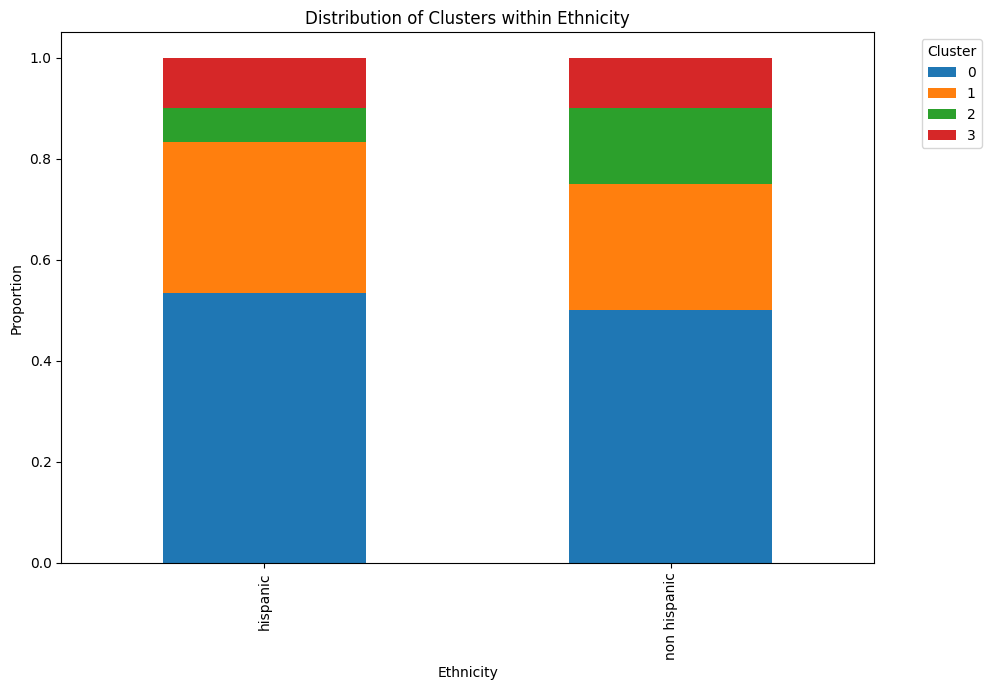

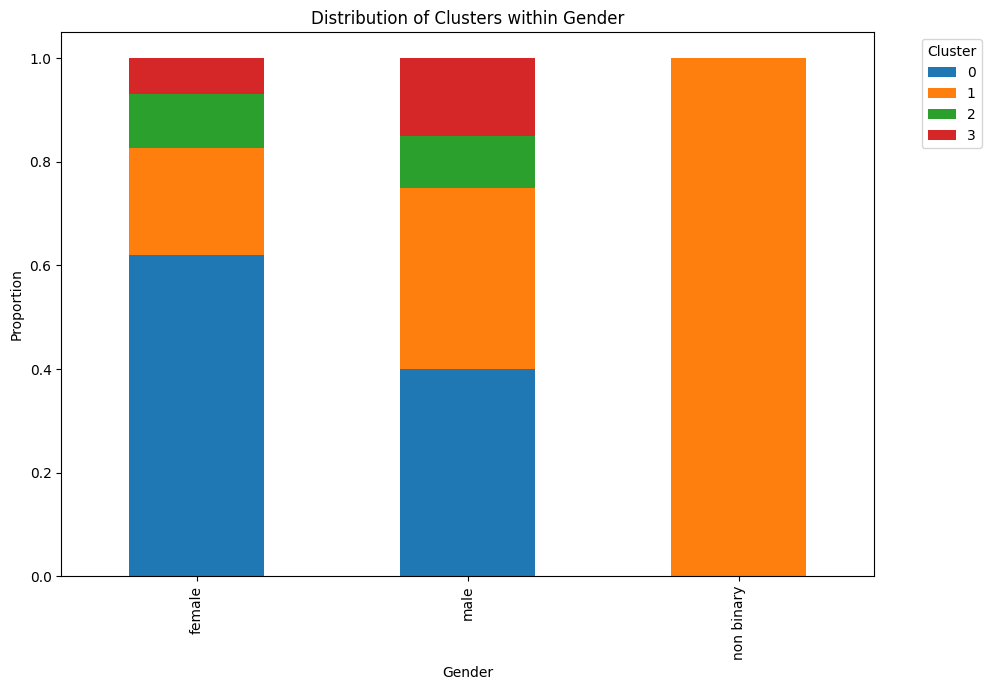

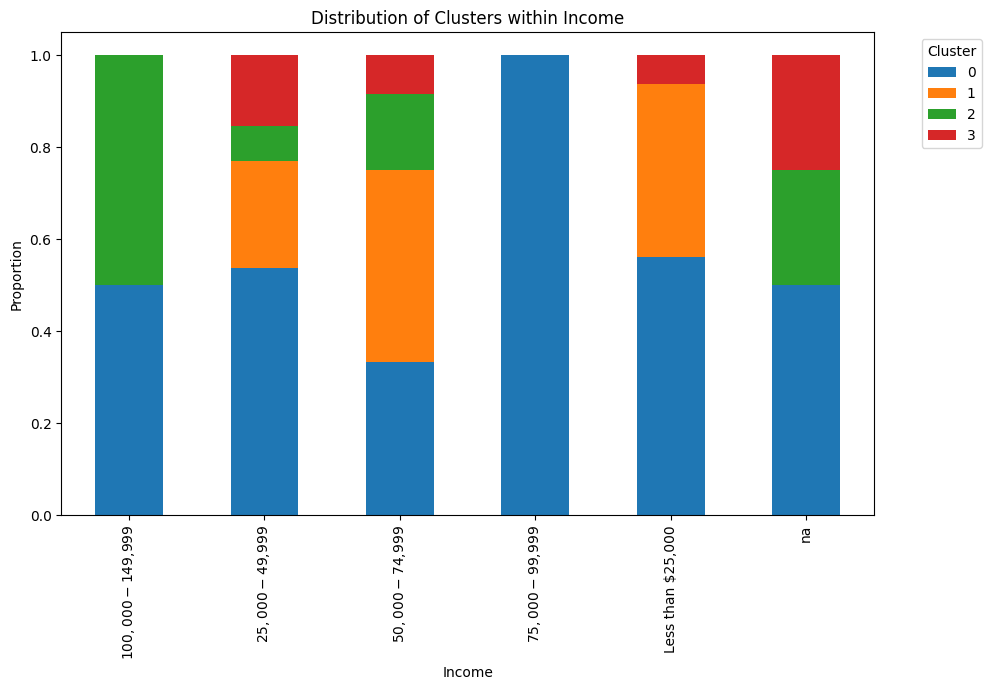

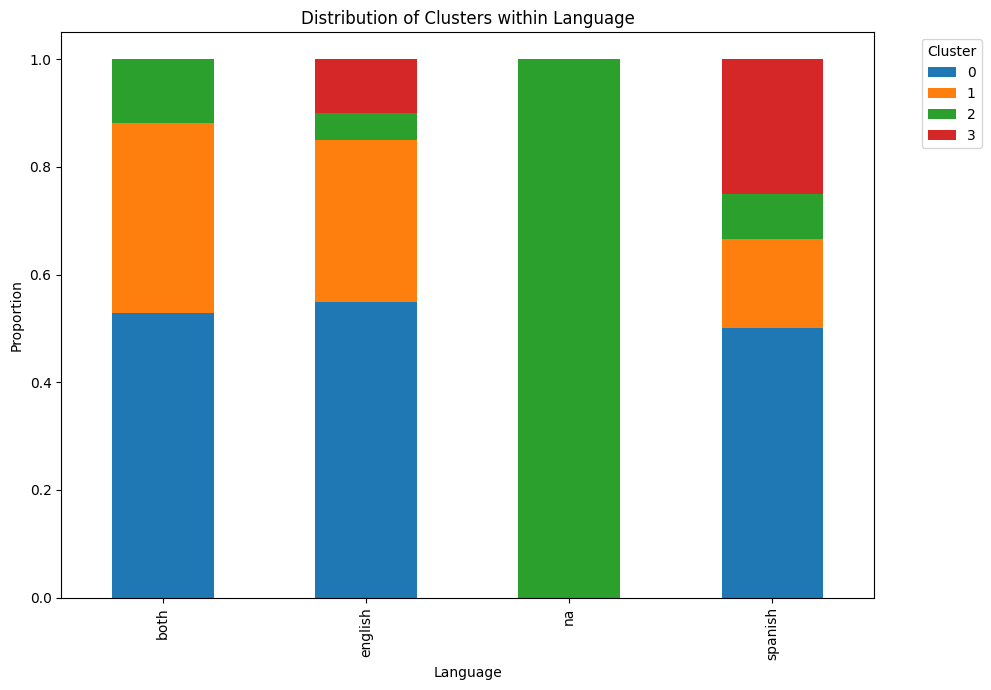

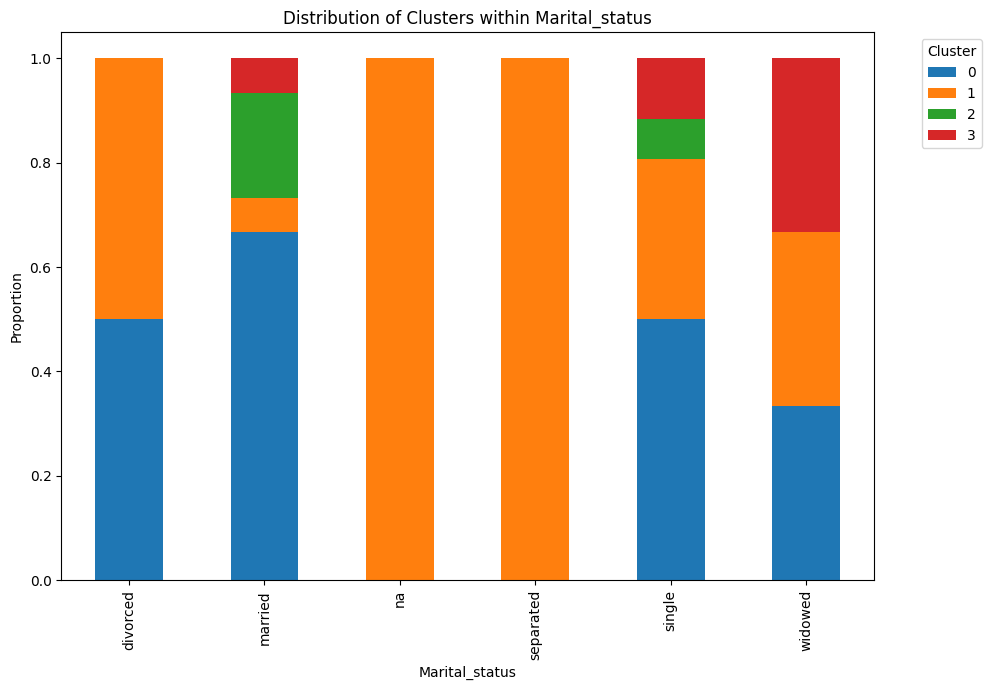

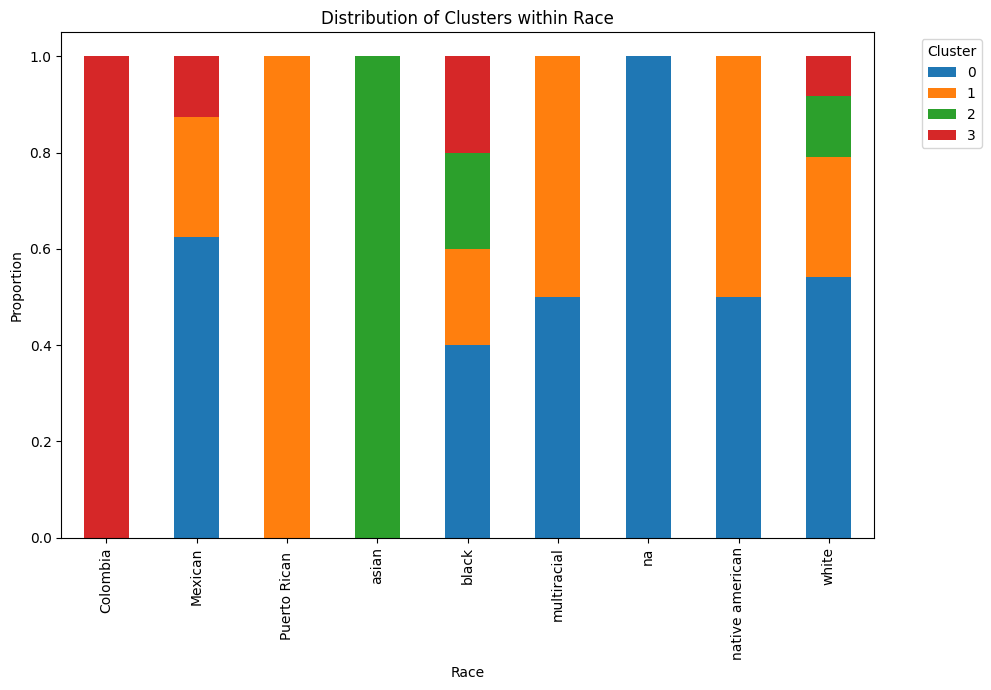

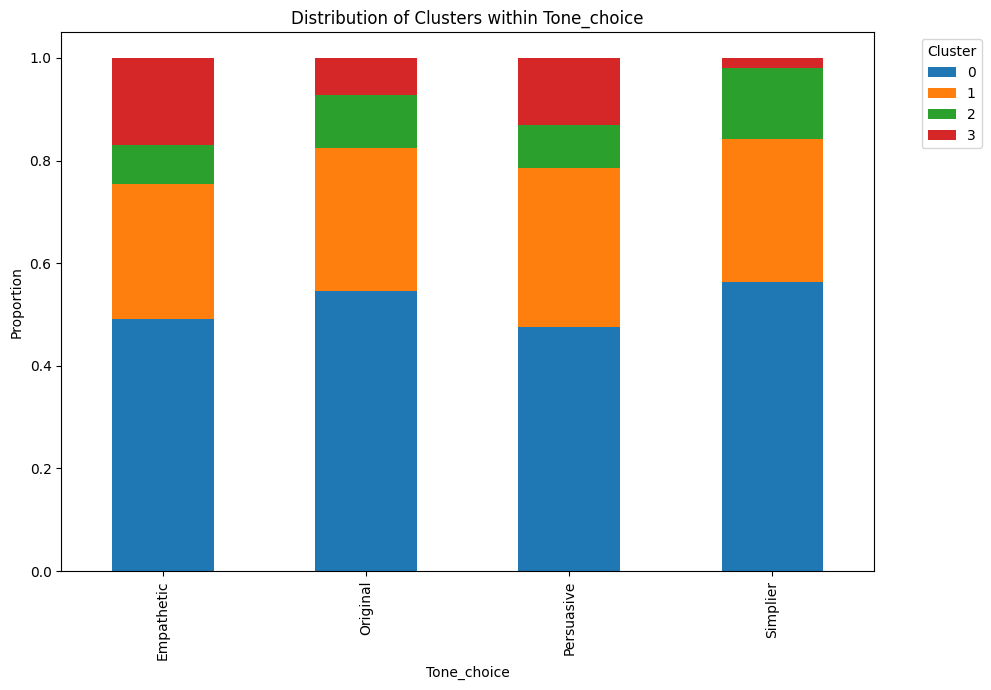

In [6]:
# Plotting function
def plot_stacked_bar(df, age_col='age', cluster_col='Cluster'):
    variables = df.columns.difference([age_col, cluster_col])
    for var in variables:
        # Create a crosstab
        crosstab = pd.crosstab(df[var], df[cluster_col], normalize='index')
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 7))

        # Add titles and labels
        plt.title(f'Distribution of Clusters within {var.capitalize()}')
        plt.xlabel(var.capitalize())
        plt.ylabel('Proportion')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Generate plots
plot_stacked_bar(df)

## Supervise Model Training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
df = df[['education','income', 'tone_choice']]

In [13]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split the data into training and testing sets
X = df.drop(columns='tone_choice')
y = df['tone_choice']


In [14]:
X

,education,income
0,3,1
1,3,4
2,0,4
3,0,4
4,1,1
...,...,...
395,0,4
396,0,1
397,1,5
398,1,2


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# print(classification_report(y_test, y_pred))

Accuracy: 0.2625
